| Nama                                | Kelas | NIM        |
| ----------------------------------- | ----- | ---------- |
| Ulfi Mustatiq Abidatul Izza         | TI-3H | 2141720052 |

# Tugas Praktikum

Tugas Praktikum: Multiple Linear Regression dan Support Vector Regression (SVR) dengan Dataset Medical Cost Personal Datasets

**Instruksi Umum:**

1. Anda akan menggunakan dataset "Medical Cost Personal Datasets". Pastikan Anda telah mengunduh dataset ini.

2. Gunakan bahasa pemrograman Python dan library yang sesuai seperti NumPy, Pandas, Matplotlib dan Scikit-Learn untuk melakukan analisis regresi dan SVR.

In [1]:
# import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# baca data dari file CSV
data = pd.read_csv('data/insurance.csv')

# melihat beberapa data awal
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


*Penjelasan :*
- Yang pertama dilakukan adalah Import package dimana pada bagian ini, beberapa package yang diperlukan diimpor, yaitu numpy untuk operasi numerik, pandas untuk manipulasi data, matplotlib.pyplot untuk visualisasi data, StandardScaler untuk melakukan feature scaling, LabelEncoder untuk mengkodekan variabel kategorikal, dan LinearRegression untuk membuat model regresi linear.
- Kemudian membaca data dari file CSV yaitu file 'insurance.csv' menggunakan fungsi pd.read_csv(). Yang kemudian disimpan dalam variabel data.
- Melihat beberapa data awal: Digunakan fungsi data.head() untuk melihat 5 baris pertama dari data. 

**Tugas 1: Multiple Linear Regression**

1. Identifikasi variabel-variabel yang akan digunakan sebagai variabel bebas (fitur) dan variabel target (biaya medis personal).

***Jawab***

### Melakukan Proses Encoding

Encoding dilakukan untuk mengubah nilai-nilai kategorikal menjadi nilai numerik, sebelum melakukan operasi pada perhitungan selanjutnya, dilakukan terlebih dahulu ecoding pada variabel 'sex', 'smoker', dan 'region' 

In [2]:
# Encoding

label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])
data['smoker'] = label_encoder.fit_transform(data['smoker'])
data['region'] = label_encoder.fit_transform(data['region'])

# Menyimpan data yang telah diencode ke dalam file CSV
data.to_csv("insurance_encoded.csv", index=False)

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


### Identifikasi Variabel Independen dan Dependen

Pada langkah ini dilakukan untuk mengidentifikasi variabel bebas/ fitur/independen dan varibel target/ dependen untuk memahami analisis hubungan variabel-variabel dalam suatu dataset.

In [4]:
# variabel bebas/ fitur/independen
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]

# varibel target/ dependen
y = data['charges']

### Visualisasi Data

Pada langkah ini dilakukan visualisasi data menggunakan pairplot untuk menampilkan hubungan antara variabel bebas dan variabel target dalam bentuk scatter plot.

c:\Users\ULFI\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


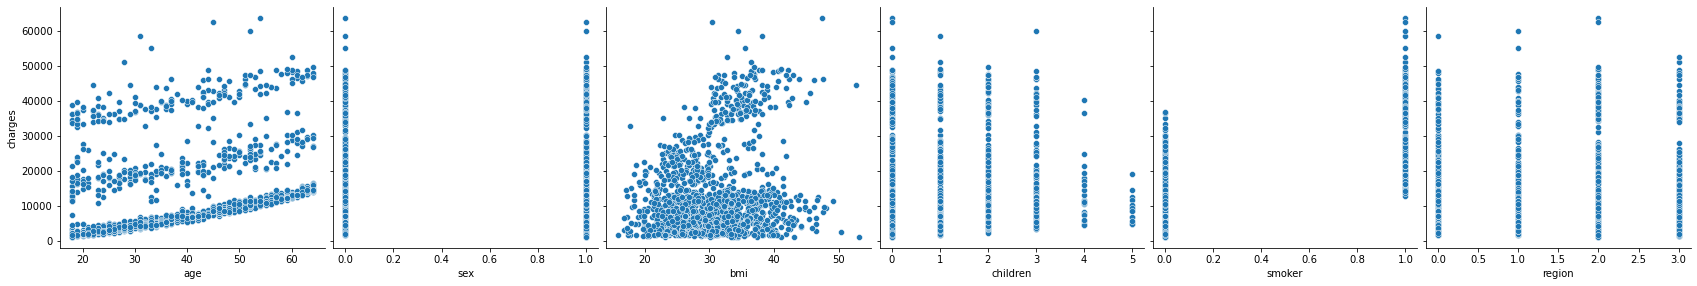

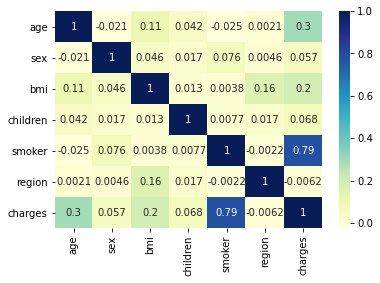

In [5]:
# import library untuk visualisasi
import seaborn as sns

# visualisasi data dengan pairplot
sns.pairplot(data, x_vars=['age', 'sex', 'bmi', 'children', 'smoker', 'region'],
             y_vars='charges', size=4, aspect=1, kind='scatter')
plt.show()

# visualisasi korelasi dengan heatmap
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True)
plt.show()

2. Bagi dataset menjadi data latih (train) dan data uji (test) dengan proporsi yang sesuai.

***Jawab***

### Membagi Dataset Menjadi Data Latih dan Data Uji dengan Proporsi 7:3

Kemudian dilakukan pembagian dataset menjadi data latih(train) dan data uji(test) dengan proporsi yang sesuai. Di sini saya membagi data latih dan data uji dengan proporsi 7:3.

In [6]:
# Pembagian data latih dan data uji dengan proporsi 7:3 (70% data latih, 30% data uji)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

3. Lakukan feature scaling jika diperlukan.

***Jawab***

### Melakukan Feature Scaling

Pada langkah ini terdapat kode *y = y.values.reshape(-1, 1)* yang digunakan untuk mengubah data yang awalnya 1D menjadi bentuk 2D dengan 1 kolom.

Kemudian setelah itu dilakukan Feature Scaling yang digunakan untuk menghindari masalah di mana beberapa fitur yang memiliki rentang nilai yang jauh berbeda dapat memiliki pengaruh yang tidak seimbang pada model pembelajaran mesin. Beberapa algoritma pembelajaran mesin juga lebih sensitif terhadap perbedaan skala fitur daripada yang lain.

In [7]:
y = y.values.reshape(-1, 1) #mengubah data dari 1D menjadi 2D dengan 1 kolom

# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

### Melatih Model SVR
Pada langkah ini dilakukan fitting SVR ke dataset adalah untuk menghasilkan model yang dapat digunakan untuk memprediksi nilai kontinu (numerik) berdasarkan fitur-fitur yang ada dalam dataset. 
Kemudian setelah itu dilakukan pembuatan  prediksi menggunakan model Support Vector Regression (SVR) yang telah dilatih sebelumnya.

In [8]:
# Fitting SVR ke dataset
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(X, y)

c:\Users\ULFI\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [9]:
# Prediksi Hasil
from sklearn.svm import SVR

# Inisialisasi model SVR
svr_model = SVR(kernel='rbf')  # Anda dapat memilih kernel yang sesuai dengan data Anda

# Melatih model SVR menggunakan data latih yang telah di-scale
svr_model.fit(X, y)

# Membuat prediksi dengan model SVR
y_pred_svr = svr_model.predict(X)

c:\Users\ULFI\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


### Visualisasi Hasil SVR

Pada langkah ini dilakukan untuk memahami sejauh mana model dapat memprediksi dengan akurat nilai target (dalam hal ini, biaya medis) berdasarkan data yang telah digunakan untuk pelatihan dan pengujian.
Dimana pada hasil SVR ini menggambarkan sejauh mana model SVR cocok dengan data sebenarnya. Sehingga, semakin dekat titik merah dengan titik biru, semakin baik performa model SVR.

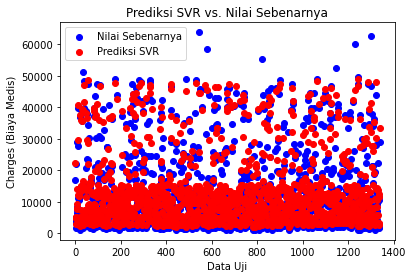

In [10]:
# Invers scaling untuk hasil prediksi dan nilai sebenarnya
y_pred_original = sc_y.inverse_transform(y_pred_svr)
y_test_original = sc_y.inverse_transform(y)

# Plot hasil prediksi vs. nilai sebenarnya
plt.scatter(range(len(y_test_original)), y_test_original, color='blue', label='Nilai Sebenarnya')
plt.scatter(range(len(y_pred_original)), y_pred_original, color='red', label='Prediksi SVR')
plt.xlabel('Data Uji')
plt.ylabel('Charges (Biaya Medis)')
plt.legend()
plt.title('Prediksi SVR vs. Nilai Sebenarnya')
plt.show()

4. Buat model multiple linear regression menggunakan Scikit-Learn.

***Jawab***

### Melatih Model pada Data Latih
Pada langkah ini dilakukan melatih model pada data latih yang diawali dengan membuat objek model regresi Linear Regression. Kemudian melatih model menggunakan data latih yang menghubungkan antar variabel independen dengan variabel dependen dari data latih untuk menghasilkan model regresi linier yang sesuai.

In [11]:
# Membuat model Linear Regression
model = LinearRegression()

# Melatih model pada data latih
model.fit(X_train, y_train)

LinearRegression()

5. Latih model pada data latih dan lakukan prediksi pada data uji.

***Jawab***

### Memprediksi Data Uji
Setelah melatih model data latih, kemudian dilakukan prediksi data uji untuk memperoleh nilai prediksi berdasarkan hubungan yang telah dipelajari selama dilatih. 

In [12]:
# Melakukan prediksi pada data uji
y_pred = model.predict(X_test)

### Visualisasi Prediksi pada Data Uji
Steelah itu juga dilakukan visualisasi prediksi data uji yang digunakan untuk mengukur kinerja model, dimana dapat melihat sejauh mana model Linear Regression yang telah dilatih mampu memprediksi dengan akurat. Titik-titik pada grafik yang berdekatan dengan garis diagonal merah menunjukkan prediksi yang baik, sementara titik-titik yang jauh dari garis diagonal merah menunjukkan adanya kesalahan prediksi.

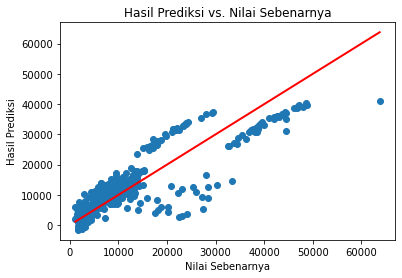

In [12]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Nilai Sebenarnya")
plt.ylabel("Hasil Prediksi")
plt.title("Hasil Prediksi vs. Nilai Sebenarnya")

# Menambahkan garis regresi (garis dengan kemiringan 45 derajat)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-', lw=2)

plt.show()

6. Evaluasi model dengan menghitung metrik seperti R-squared, MSE, dan MAE. Tampilkan hasil evaluasi.

***Jawab***

### Evaluasi Model SVR

1. **R-squared (R^2)** digunakan untuk mengukur seberapa baik model regresi cocok dengan data aktual, nilai R-squared berkisar antara 0 hingga 1. Semakin tinggi nilai R-squared, semakin baik model Anda cocok dengan data.
2. **Mean Squared Error (MSE)** digunakan untuk mengukur rata-rata dari kuadrat kesalahan prediksi, dan skala nilai MSE bergantung pada skala variabel target. Semakin kecil nilai MSE, semakin baik, karena ini menunjukkan bahwa kesalahan prediksi model cenderung kecil.
3. **Mean Absolute Error (MAE)** digunakan untuk mengukur rata-rata dari nilai absolut kesalahan prediksi model terhadap nilai sebenarnya. Semakin rendah nilai MAE, semakin baik. Seperti MSE, dalam konteks MAE, nilai 0 akan ideal karena itu berarti tidak ada kesalahan prediksi sama sekali.

In [12]:
# Evaluasi model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_actual = y 
y_pred = regressor.predict(X)

r_squared = r2_score(y_actual, y_pred)
mse = mean_squared_error(y_actual, y_pred)
mae = mean_absolute_error(y_actual, y_pred)

# Menampilkan hasil evaluasi
print("R-squared (R2):", r_squared)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

R-squared (R2): 0.8580074170742829
Mean Squared Error (MSE): 0.14199258292571715
Mean Absolute Error (MAE): 0.20128586735349396
